In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import time
import statistics
import sklearn

In [2]:
import matplotlib.ticker as mtick

In [3]:
from sklearn import linear_model, metrics, model_selection, preprocessing

In [4]:
from sklearn.model_selection import StratifiedShuffleSplit
from scipy import sparse

In [5]:
from scipy import stats

In [6]:
from statsmodels.graphics.gofplots import qqplot

To do : <br>
1. Perform linear regression on original dataset<br>
2. Made some adjustement on linear regression to get better result<br>
3. Perform Lasso and Ridge regression<br>
4. Perform the above for different datasets (PVA, ICA, Factor, ...) <br>

In [7]:
Ames = pd.read_csv('AmesFinalDB.csv')
Ames.drop(['Unnamed: 0'],axis=1,inplace=True)
Ames.head(3)

,MS_SubClass,MS_Zoning,Lot_Frontage,Lot_Area,Lot_Shape,Land_Contour,Lot_Config,Land_Slope,Neighborhood,Condition_1,...,Mo_Sold,Sale_Type,Sale_Condition,SalePrice,exterior,basement_type,basement_area,age,remodeled_age,garage_age
0,20,RL,141.0,31770,IR1,Lvl,Corner,Gtl,NAmes,Norm,...,5,WD,Normal,215000,0,BLQ_Unf,639.0,50,0,50.0
1,20,RH,80.0,11622,Reg,Lvl,Inside,Gtl,NAmes,Feedr,...,6,WD,Normal,105000,VinylSd_VinylSd,Rec_LwQ,612.0,49,0,49.0
2,20,RL,81.0,14267,IR1,Lvl,Corner,Gtl,NAmes,Norm,...,6,WD,Normal,172000,Wd Sdng_Wd Sdng,ALQ_Unf,923.0,52,0,52.0


In [8]:
print('Ames shape is : ', str(Ames.shape))

Ames shape is :  (2930, 59)


In [9]:
categorical_features = ['MS_SubClass','MS_Zoning','Lot_Shape','Land_Contour','Lot_Config','Land_Slope']
categorical_features.extend(['Neighborhood','Condition_1','Bldg_Type','House_Style','Roof_Style'])
categorical_features.extend(['Mas_Vnr_Type','Exter_Qual','Exter_Cond','Foundation','Bsmt_Qual','Bsmt_Exposure'])
categorical_features.extend(['basement_type','Heating_QC','Garage_Finish','Mo_Sold','Sale_Type','Sale_Condition','Kitchen_Qual'])
categorical_features.extend(['exterior','Fireplace_Qu','Garage_Type','Garage_Qual'])

Ordinal_featues = ['Overall_Qual','Overall_Cond','Bsmt_Full_Bath','Bsmt_Half_Bath','Bedroom_AbvGr','Full_Bath',
                  'Half_Bath','Kitchen_AbvGr','TotRms_AbvGrd','Fireplaces','Garage_Cars']

Continous_features = ['Lot_Frontage','Lot_Area','age','remodeled_age','Mas_Vnr_Area','basement_area']
Continous_features.extend(['Bsmt_Unf_SF','Total_Bsmt_SF','1st_Flr_SF','2nd_Flr_SF','Low_Qual_Fin_SF'])
Continous_features.extend(['Gr_Liv_Area'])              
Continous_features.extend(['Garage_Area'])
Continous_features.extend(['Wood_Deck_SF','Open_Porch_SF','Enclosed_Porch','Screen_Porch','Pool_Area'])
Continous_features.extend(['SalePrice','garage_age'])

In [10]:
X = Ames.drop(['SalePrice'],axis=1)
Y = Ames.SalePrice

In [11]:
AmesFinal = X.drop(categorical_features,axis = 1)
AmesData = AmesFinal.values
AmesCol = AmesFinal.columns

for ifeature in categorical_features:
    
    temp_df = pd.get_dummies(Ames.loc[:,ifeature], prefix = ifeature, prefix_sep = '_')
    AmesCol = list(AmesCol) + list(temp_df.columns)
    temp_data = temp_df.values
    AmesData = np.hstack([AmesData,temp_data])
    
AmesFinal = pd.DataFrame(AmesData, columns = AmesCol)

In [12]:
print('Ames final shape is : ', str(AmesFinal.shape))

Ames final shape is :  (2930, 254)


In [13]:
np.random.seed(144)

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [15]:
scaler = StandardScaler()

In [16]:
AmesFinal_scale = scaler.fit_transform(AmesFinal)

In [17]:
AmesFinal['salePriceCat'] = pd.cut(Ames.SalePrice,bins=10,labels = range(10)).values

In [18]:
X = AmesFinal.drop(['salePriceCat'],axis = 1)
Y = Ames['SalePrice']

In [19]:
np.random.seed(144)

In [20]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size = 0.33)
ols = linear_model.LinearRegression()
ols.set_params(n_jobs = -1)
%time ols.fit(X_train,Y_train)
print('Score for test  data is :' + str(np.round(ols.score(X_train,Y_train),3)))
print('Score for train data is :' + str(np.round(ols.score(X_test,Y_test),3)))

CPU times: total: 8.86 s
Wall time: 6.39 s
Score for test  data is :0.91
Score for train data is :0.873


In [21]:
import statsmodels.api as sm

In [22]:
X_const = sm.add_constant(X_train)
mod = sm.OLS(Y_train,X_const)
res = mod.fit()

In [23]:
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.910
Model:                            OLS   Adj. R-squared:                  0.899
Method:                 Least Squares   F-statistic:                     78.57
Date:                Tue, 20 Sep 2022   Prob (F-statistic):               0.00
Time:                        11:41:18   Log-Likelihood:                -22627.
No. Observations:                1963   AIC:                         4.570e+04
Df Residuals:                    1738   BIC:                         4.696e+04
Df Model:                         224                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

In [24]:
Y_pred_train = ols.predict(X_train)
Y_pred_test  = ols.predict(X_test)
error_train = Y_pred_train - Y_train
error_test  = Y_pred_test - Y_test 

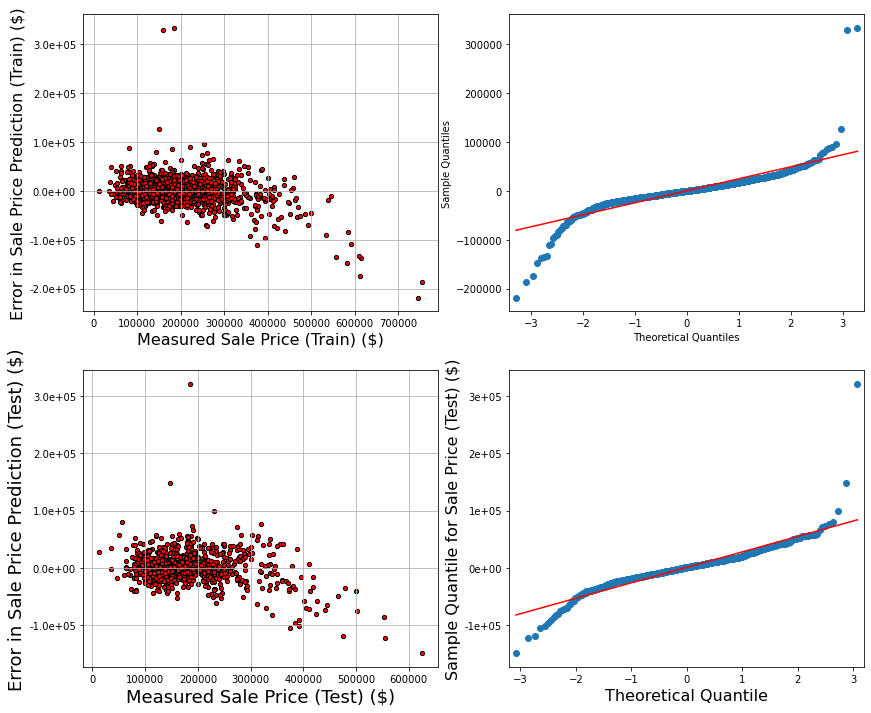

In [25]:
fig, axis = plt.subplots(2,2,figsize=(14,12))

axis[0,0].scatter(Y_train,error_train, color = 'red', edgecolors='black', s = 18)
axis[0,0].set_xlabel('Measured Sale Price (Train) ($)', fontsize = 16)
axis[0,0].set_ylabel('Error in Sale Price Prediction (Train) ($)', fontsize = 16)
axis[0,0].yaxis.set_major_formatter(mtick.FormatStrFormatter('%.1e'))
axis[0,0].grid()

av = qqplot(error_train, line = 's' , ax = axis[0,1]) 
av = av.gca()
av.set_xlabel('Theoretical Quantile', fontsize = 16)
av.set_ylabel('Sample Quantile for Sale Price (Train) ($)', fontsize = 16)
av.yaxis.set_major_formatter(mtick.FormatStrFormatter('%.0e'))

axis[1,0].scatter(Y_test,error_test, color = 'red', edgecolors='black', s = 18)
axis[1,0].set_xlabel('Measured Sale Price (Test) ($)', fontsize = 18)
axis[1,0].set_ylabel('Error in Sale Price Prediction (Test) ($)', fontsize = 18)
axis[1,0].yaxis.set_major_formatter(mtick.FormatStrFormatter('%.1e'))
axis[1,0].grid()

av = qqplot(error_test, line = 's' , ax = axis[1,1]) 
av = av.gca()
av.set_xlabel('Theoretical Quantile', fontsize = 16)
av.set_ylabel('Sample Quantile for Sale Price (Test) ($)', fontsize = 16)
av.yaxis.set_major_formatter(mtick.FormatStrFormatter('%.0e'))

plt.show()

In [26]:
fitted_data, fitted_lambda = stats.boxcox(Y)
print('The fitting parameter for box-cox transformation is :', np.round(fitted_lambda,3))

The fitting parameter for box-cox transformation is : 0.008


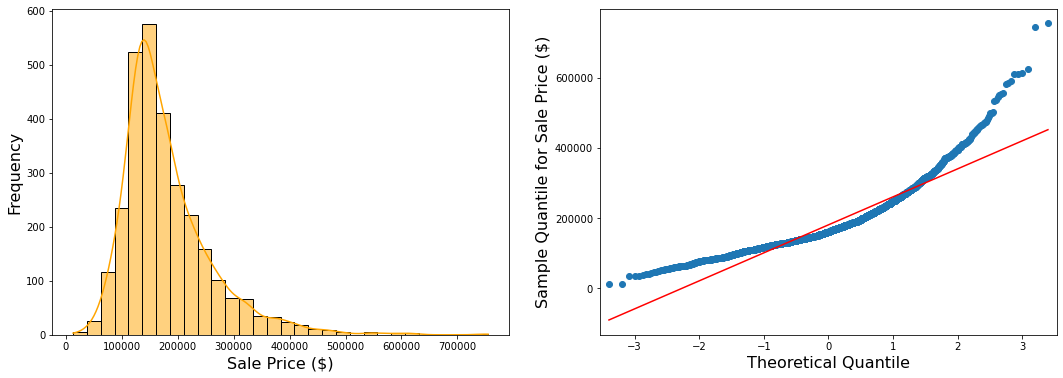

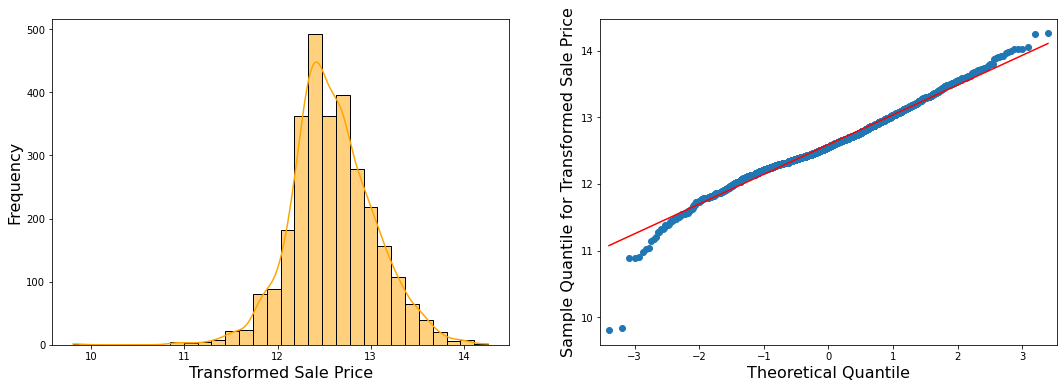

In [27]:
fig, axis = plt.subplots(1,2,figsize=(18,6))

av = sns.histplot(Y,bins = 30, kde = True, color = 'orange', ax = axis[0])
av.set_xlabel('Sale Price ($)',fontsize=16)
av.set_ylabel('Frequency',fontsize=16)

av = qqplot(Y, line = 's' , ax = axis[1]) 
av = av.gca()
av.set_xlabel('Theoretical Quantile', fontsize=16)
av.set_ylabel('Sample Quantile for Sale Price ($)', fontsize=16)

fig, axis = plt.subplots(1,2,figsize=(18,6))

av = sns.histplot(fitted_data,bins = 30, kde = True, color = 'orange', ax = axis[0])
av.set_xlabel('Transformed Sale Price',fontsize=16)
av.set_ylabel('Frequency',fontsize=16)

av = qqplot(fitted_data, line = 's' , ax = axis[1]) 
av = av.gca()
av.set_xlabel('Theoretical Quantile', fontsize=16)
av.set_ylabel('Sample Quantile for Transformed Sale Price', fontsize=16)
plt.show()

In [28]:
np.random.seed(144)
X_train, X_test, Y_train, Y_test = train_test_split(X,fitted_data,test_size = 0.33)
ols_boxcox = linear_model.LinearRegression()
ols_boxcox.set_params(n_jobs = -1)
%time ols_boxcox.fit(X_train,Y_train)
print('Score for test  data is :' + str(np.round(ols_boxcox.score(X_train,Y_train),3)))
print('Score for train data is :' + str(np.round(ols_boxcox.score(X_test,Y_test),3)))

CPU times: total: 13 s
Wall time: 6.58 s
Score for test  data is :0.927
Score for train data is :0.885


In [29]:
X_const = sm.add_constant(X_train)
mod = sm.OLS(Y_train,X_const)
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.927
Model:                            OLS   Adj. R-squared:                  0.918
Method:                 Least Squares   F-statistic:                     98.59
Date:                Tue, 20 Sep 2022   Prob (F-statistic):               0.00
Time:                        11:41:41   Log-Likelihood:                 1335.2
No. Observations:                1963   AIC:                            -2220.
Df Residuals:                    1738   BIC:                            -964.4
Df Model:                         224                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

In [30]:
Y_pred_train = ols_boxcox.predict(X_train)
Y_pred_test  = ols_boxcox.predict(X_test)
error_train = Y_pred_train - Y_train
error_test  = Y_pred_test - Y_test 

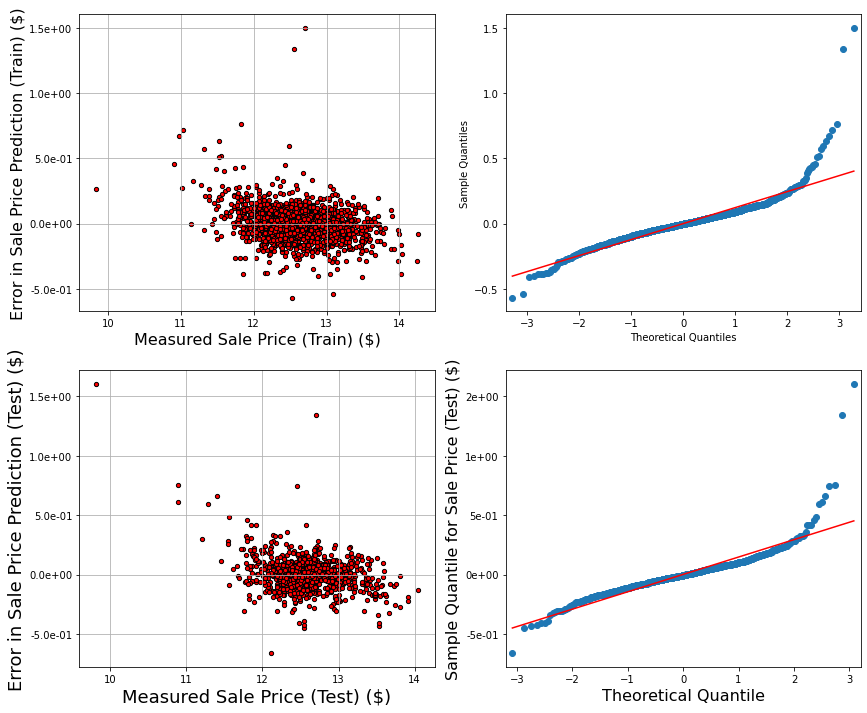

In [31]:
fig, axis = plt.subplots(2,2,figsize=(14,12))

axis[0,0].scatter(Y_train,error_train, color = 'red', edgecolors='black', s = 18)
axis[0,0].set_xlabel('Measured Sale Price (Train) ($)', fontsize = 16)
axis[0,0].set_ylabel('Error in Sale Price Prediction (Train) ($)', fontsize = 16)
axis[0,0].yaxis.set_major_formatter(mtick.FormatStrFormatter('%.1e'))
axis[0,0].grid()

av = qqplot(error_train, line = 's' , ax = axis[0,1]) 
av = av.gca()
av.set_xlabel('Theoretical Quantile', fontsize = 16)
av.set_ylabel('Sample Quantile for Sale Price (Train) ($)', fontsize = 16)
av.yaxis.set_major_formatter(mtick.FormatStrFormatter('%.0e'))

axis[1,0].scatter(Y_test,error_test, color = 'red', edgecolors='black', s = 18)
axis[1,0].set_xlabel('Measured Sale Price (Test) ($)', fontsize = 18)
axis[1,0].set_ylabel('Error in Sale Price Prediction (Test) ($)', fontsize = 18)
axis[1,0].yaxis.set_major_formatter(mtick.FormatStrFormatter('%.1e'))
axis[1,0].grid()

av = qqplot(error_test, line = 's' , ax = axis[1,1]) 
av = av.gca()
av.set_xlabel('Theoretical Quantile', fontsize = 16)
av.set_ylabel('Sample Quantile for Sale Price (Test) ($)', fontsize = 16)
av.yaxis.set_major_formatter(mtick.FormatStrFormatter('%.0e'))

plt.show()

In [32]:
Result = {}

In [33]:
AmesPCA = pd.read_csv('PCAData.csv')
AmesPCA.drop(['Unnamed: 0'],axis=1,inplace=True)
print(AmesPCA.shape)

np.random.seed(144)

X_train, X_test, Y_train, Y_test = train_test_split(AmesPCA,fitted_data,test_size = 0.33)

ols_PCA = linear_model.LinearRegression()
ols_PCA.set_params(n_jobs = -1)
%time ols_PCA.fit(X_train,Y_train)

print('Score for test  data is :' + str(np.round(ols_PCA.score(X_train,Y_train),3)))
print('Score for train data is :' + str(np.round(ols_PCA.score(X_test,Y_test),3)))

(2930, 120)
CPU times: total: 40.3 s
Wall time: 20.1 s
Score for test  data is :0.909
Score for train data is :0.891


In [34]:
Result['PCA'] = [np.round(ols_PCA.score(X_train,Y_train),3), np.round(ols_PCA.score(X_test,Y_test),3)]

In [35]:
Y_pred_train = ols_PCA.predict(X_train)
Y_pred_test  = ols_PCA.predict(X_test)
error_train = Y_pred_train - Y_train
error_test  = Y_pred_test - Y_test 

In [36]:
X_const = sm.add_constant(X_train)
mod = sm.OLS(Y_train,X_const)
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.909
Model:                            OLS   Adj. R-squared:                  0.903
Method:                 Least Squares   F-statistic:                     153.7
Date:                Tue, 20 Sep 2022   Prob (F-statistic):               0.00
Time:                        11:42:31   Log-Likelihood:                 1120.3
No. Observations:                1963   AIC:                            -1999.
Df Residuals:                    1842   BIC:                            -1323.
Df Model:                         120                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          12.5918      0.003   3902.945      

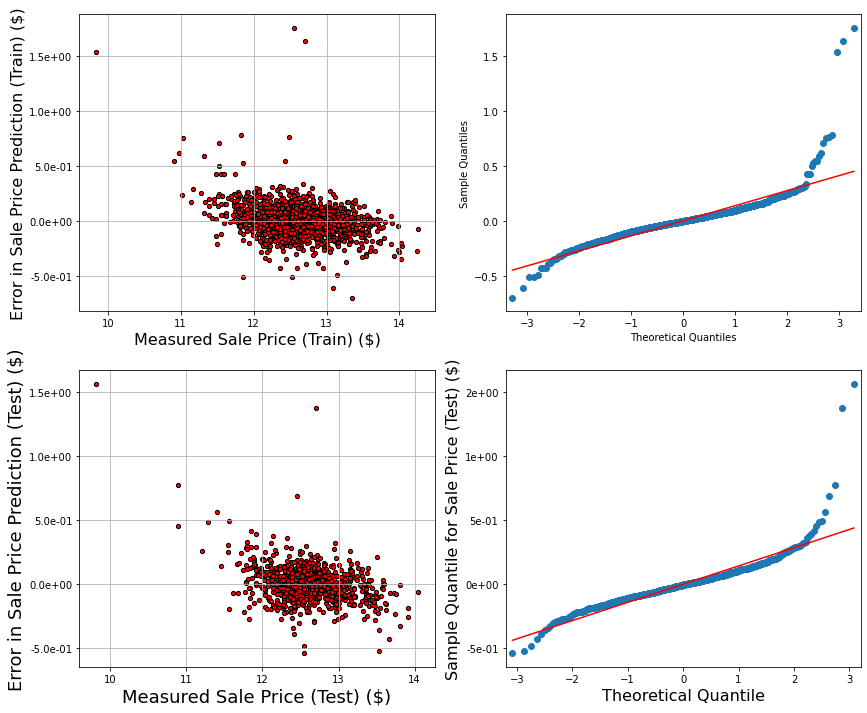

In [37]:
fig, axis = plt.subplots(2,2,figsize=(14,12))

axis[0,0].scatter(Y_train,error_train, color = 'red', edgecolors='black', s = 18)
axis[0,0].set_xlabel('Measured Sale Price (Train) ($)', fontsize = 16)
axis[0,0].set_ylabel('Error in Sale Price Prediction (Train) ($)', fontsize = 16)
axis[0,0].yaxis.set_major_formatter(mtick.FormatStrFormatter('%.1e'))
axis[0,0].grid()

av = qqplot(error_train, line = 's' , ax = axis[0,1]) 
av = av.gca()
av.set_xlabel('Theoretical Quantile', fontsize = 16)
av.set_ylabel('Sample Quantile for Sale Price (Train) ($)', fontsize = 16)
av.yaxis.set_major_formatter(mtick.FormatStrFormatter('%.0e'))

axis[1,0].scatter(Y_test,error_test, color = 'red', edgecolors='black', s = 18)
axis[1,0].set_xlabel('Measured Sale Price (Test) ($)', fontsize = 18)
axis[1,0].set_ylabel('Error in Sale Price Prediction (Test) ($)', fontsize = 18)
axis[1,0].yaxis.set_major_formatter(mtick.FormatStrFormatter('%.1e'))
axis[1,0].grid()

av = qqplot(error_test, line = 's' , ax = axis[1,1]) 
av = av.gca()
av.set_xlabel('Theoretical Quantile', fontsize = 16)
av.set_ylabel('Sample Quantile for Sale Price (Test) ($)', fontsize = 16)
av.yaxis.set_major_formatter(mtick.FormatStrFormatter('%.0e'))

plt.show()

In [38]:
AmesGaussian = pd.read_csv('GausianData.csv')
AmesGaussian.drop(['Unnamed: 0'],axis=1,inplace=True)
print(AmesGaussian.shape)
np.random.seed(144)

X_train, X_test, Y_train, Y_test = train_test_split(AmesGaussian,fitted_data,test_size = 0.33)

ols_Gauss = linear_model.LinearRegression()
ols_Gauss.set_params(n_jobs = -1)
%time ols_Gauss.fit(X_train,Y_train)

print('Score for test  data is :' + str(np.round(ols_Gauss.score(X_train,Y_train),3)))
print('Score for train data is :' + str(np.round(ols_Gauss.score(X_test,Y_test),3)))

(2930, 191)
CPU times: total: 5.27 s
Wall time: 2.23 s
Score for test  data is :0.922
Score for train data is :0.884


In [39]:
Result['Guassian'] = [np.round(ols_Gauss.score(X_train,Y_train),3), np.round(ols_Gauss.score(X_test,Y_test),3)]

In [40]:
AmesGaussianSparse = pd.read_csv('GausianDataSparse.csv')
AmesGaussianSparse.drop(['Unnamed: 0'],axis=1,inplace=True)
print(AmesGaussianSparse.shape)
np.random.seed(144)

X_train, X_test, Y_train, Y_test = train_test_split(AmesGaussianSparse,fitted_data,test_size = 0.33)

ols_GaussSparse = linear_model.LinearRegression()
ols_GaussSparse.set_params(n_jobs = -1)
%time ols_GaussSparse.fit(X_train,Y_train)

print('Score for test  data is :' + str(np.round(ols_GaussSparse.score(X_train,Y_train),3)))
print('Score for train data is :' + str(np.round(ols_GaussSparse.score(X_test,Y_test),3)))

(2930, 192)
CPU times: total: 7.05 s
Wall time: 3.44 s
Score for test  data is :0.918
Score for train data is :0.89


In [41]:
Result['GuassianSparse'] = [np.round(ols_GaussSparse.score(X_train,Y_train),3), np.round(ols_GaussSparse.score(X_test,Y_test),3)]

In [42]:
df = pd.read_csv('ICAData.csv')
df.drop(['Unnamed: 0'],axis=1,inplace=True)
print(df.shape)
np.random.seed(144)

X_train, X_test, Y_train, Y_test = train_test_split(df,fitted_data,test_size = 0.33)

ols_ICA = linear_model.LinearRegression()
ols_ICA.set_params(n_jobs = -1)
%time ols_ICA.fit(X_train,Y_train)

print('Score for test  data is :' + str(np.round(ols_ICA.score(X_train,Y_train),3)))
print('Score for train data is :' + str(np.round(ols_ICA.score(X_test,Y_test),3)))

(2930, 80)
CPU times: total: 27.3 s
Wall time: 13.4 s
Score for test  data is :0.894
Score for train data is :0.883


In [43]:
Result['ICA'] = [np.round(ols_ICA.score(X_train,Y_train),3), np.round(ols_ICA.score(X_test,Y_test),3)]

In [44]:
df = pd.read_csv('FactorData.csv')
df.drop(['Unnamed: 0'],axis=1,inplace=True)
print(df.shape)
np.random.seed(144)

X_train, X_test, Y_train, Y_test = train_test_split(df,fitted_data,test_size = 0.33)

ols_Factor = linear_model.LinearRegression()
ols_Factor.set_params(n_jobs = -1)
%time ols_Factor.fit(X_train,Y_train)

print('Score for test  data is :' + str(np.round(ols_Factor.score(X_train,Y_train),3)))
print('Score for train data is :' + str(np.round(ols_Factor.score(X_test,Y_test),3)))

(2930, 80)
CPU times: total: 12.4 s
Wall time: 6.38 s
Score for test  data is :0.867
Score for train data is :0.855


In [45]:
Result['Factor'] = [np.round(ols_Factor.score(X_train,Y_train),3), np.round(ols_Factor.score(X_test,Y_test),3)]

In [46]:
df = pd.read_csv('TruncatedSVDData.csv')
df.drop(['Unnamed: 0'],axis=1,inplace=True)
print(df.shape)
np.random.seed(144)

X_train, X_test, Y_train, Y_test = train_test_split(df,fitted_data,test_size = 0.33)

ols_svd = linear_model.LinearRegression()
ols_svd.set_params(n_jobs = -1)
%time ols_svd.fit(X_train,Y_train)

print('Score for test  data is :' + str(np.round(ols_svd.score(X_train,Y_train),3)))
print('Score for train data is :' + str(np.round(ols_svd.score(X_test,Y_test),3)))

(2930, 16)
CPU times: total: 4.98 s
Wall time: 2.3 s
Score for test  data is :0.864
Score for train data is :0.86


In [47]:
Result['SVD'] = [np.round(ols_svd.score(X_train,Y_train),3), np.round(ols_svd.score(X_test,Y_test),3)]

In [48]:
df = pd.read_csv('KernalPCAData.csv')
df.drop(['Unnamed: 0'],axis=1,inplace=True)
print(df.shape)
np.random.seed(144)

X_train, X_test, Y_train, Y_test = train_test_split(df,Y,test_size = 0.33)

ols_kernal = linear_model.LinearRegression()
ols_kernal.set_params(n_jobs = -1)
%time ols_kernal.fit(X_train,Y_train)

print('Score for test  data is :' + str(np.round(ols_kernal.score(X_train,Y_train),3)))
print('Score for train data is :' + str(np.round(ols_kernal.score(X_test,Y_test),3)))

(2930, 20)
CPU times: total: 2 s
Wall time: 1.08 s
Score for test  data is :0.007
Score for train data is :-0.022


In [49]:
Result['Kernnal'] = [np.round(ols_kernal.score(X_train,Y_train),3), np.round(ols_kernal.score(X_test,Y_test),3)]

In [50]:
df = pd.read_csv('tSNEData.csv')
df.drop(['Unnamed: 0'],axis=1,inplace=True)
print(df.shape)
np.random.seed(144)

X_train, X_test, Y_train, Y_test = train_test_split(df,fitted_data,test_size = 0.33)

ols_tSNE = linear_model.LinearRegression()
ols_tSNE.set_params(n_jobs = -1)
%time ols_tSNE.fit(X_train,Y_train)

print('Score for test  data is :' + str(np.round(ols_tSNE.score(X_train,Y_train),3)))
print('Score for train data is :' + str(np.round(ols_tSNE.score(X_test,Y_test),3)))

(2930, 3)
CPU times: total: 781 ms
Wall time: 421 ms
Score for test  data is :0.547
Score for train data is :0.506


In [51]:
Result['tSNE'] = [np.round(ols_tSNE.score(X_train,Y_train),3), np.round(ols_tSNE.score(X_test,Y_test),3)]

In [52]:
df = pd.read_csv('MDSData.csv')
df.drop(['Unnamed: 0'],axis=1,inplace=True)
print(df.shape)
np.random.seed(144)

X_train, X_test, Y_train, Y_test = train_test_split(df,fitted_data,test_size = 0.33)

ols_MDS = linear_model.LinearRegression()
ols_MDS.set_params(n_jobs = -1)
%time ols_MDS.fit(X_train,Y_train)

print('Score for test  data is :' + str(np.round(ols_MDS.score(X_train,Y_train),3)))
print('Score for train data is :' + str(np.round(ols_MDS.score(X_test,Y_test),3)))

(2930, 25)
CPU times: total: 3.28 s
Wall time: 1.58 s
Score for test  data is :0.699
Score for train data is :-4.697


In [53]:
Result['MDS'] = [np.round(ols_MDS.score(X_train,Y_train),3), np.round(ols_MDS.score(X_test,Y_test),3)]

In [54]:
df = pd.read_csv('ISOData.csv')
df.drop(['Unnamed: 0'],axis=1,inplace=True)
print(df.shape)
np.random.seed(144)

X_train, X_test, Y_train, Y_test = train_test_split(df,fitted_data,test_size = 0.33)

ols_ISO = linear_model.LinearRegression()
ols_ISO.set_params(n_jobs = -1)
%time ols_ISO.fit(X_train,Y_train)

print('Score for test  data is :' + str(np.round(ols_ISO.score(X_train,Y_train),3)))
print('Score for train data is :' + str(np.round(ols_ISO.score(X_test,Y_test),3)))

(2930, 100)
CPU times: total: 35 s
Wall time: 16.3 s
Score for test  data is :0.644
Score for train data is :0.493


In [55]:
Result['ISO'] = [np.round(ols_ISO.score(X_train,Y_train),3), np.round(ols_ISO.score(X_test,Y_test),3)]

In [56]:
Result

{'PCA': [0.909, 0.891],
 'Guassian': [0.922, 0.884],
 'GuassianSparse': [0.918, 0.89],
 'ICA': [0.894, 0.883],
 'Factor': [0.867, 0.855],
 'SVD': [0.864, 0.86],
 'Kernnal': [0.007, -0.022],
 'tSNE': [0.547, 0.506],
 'MDS': [0.699, -4.697],
 'ISO': [0.644, 0.493]}

Based on the above results, PCA is going to be picked. 

In [57]:
X_train, X_test, Y_train, Y_test = train_test_split(AmesPCA,fitted_data,test_size = 0.33)

Y_pred_train_PCA = ols_PCA.predict(X_train)
Y_pred_test_PCA = ols_PCA.predict(X_test)
error_train = Y_pred_train_PCA - Y_train
error_test  = Y_pred_test_PCA - Y_test

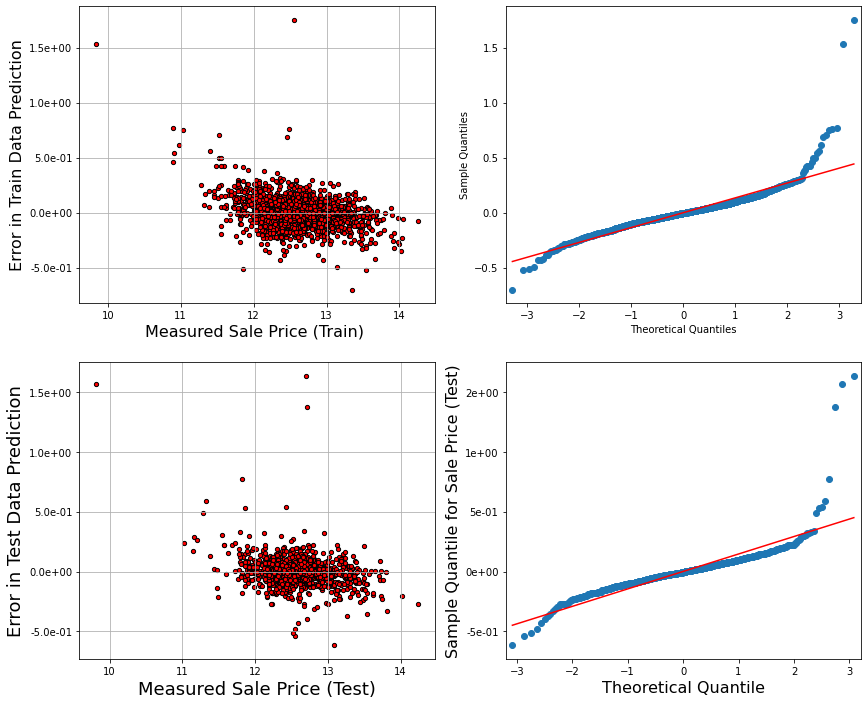

In [58]:
fig, axis = plt.subplots(2,2,figsize=(14,12))

axis[0,0].scatter(Y_train,error_train, color = 'red', edgecolors='black', s = 18)
axis[0,0].set_xlabel('Measured Sale Price (Train) ', fontsize = 16)
axis[0,0].set_ylabel('Error in Train Data Prediction', fontsize = 16)
axis[0,0].yaxis.set_major_formatter(mtick.FormatStrFormatter('%.1e'))
axis[0,0].grid()

av = qqplot(error_train, line = 's' , ax = axis[0,1]) 
av = av.gca()
av.set_xlabel('Theoretical Quantile', fontsize = 16)
av.set_ylabel('Sample Quantile for Sale Price (Train)', fontsize = 16)
av.yaxis.set_major_formatter(mtick.FormatStrFormatter('%.0e'))

axis[1,0].scatter(Y_test,error_test, color = 'red', edgecolors='black', s = 18)
axis[1,0].set_xlabel('Measured Sale Price (Test)', fontsize = 18)
axis[1,0].set_ylabel('Error in Test Data Prediction', fontsize = 18)
axis[1,0].yaxis.set_major_formatter(mtick.FormatStrFormatter('%.1e'))
axis[1,0].grid()

av = qqplot(error_test, line = 's' , ax = axis[1,1]) 
av = av.gca()
av.set_xlabel('Theoretical Quantile', fontsize = 16)
av.set_ylabel('Sample Quantile for Sale Price (Test)', fontsize = 16)
av.yaxis.set_major_formatter(mtick.FormatStrFormatter('%.0e'))

plt.show()